In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline

In [2]:
model = 'Shake-ResNet-26 2x64d (Shake-Shake-Image)'
log_dir = os.path.join('results', model)
df = pd.read_json(os.path.join(log_dir, 'log'))

df.rename(columns={
    'epoch': 'Epoch', 
    'main/accuracy': 'train_accuracy',
    'main/loss': 'train_loss',
    'validation/main/accuracy': 'test_accuracy',
    'validation/main/loss': 'test_loss'
}, inplace=True)

df['train_accuracy'] = df['train_accuracy'] * 100.0
df['test_accuracy'] = df['test_accuracy'] * 100.0

df['train_error'] = 100.0 - df['train_accuracy']
df['test_error'] = 100.0 - df['test_accuracy']

df

,elapsed_time,Epoch,iteration,lr,train_accuracy,train_loss,test_accuracy,test_loss,train_error,test_error
0,203.185398,1,391,1.000000e-01,34.850544,1.778371,44.926819,1.514795,65.149456,55.073181
1,409.270114,2,782,9.999992e-02,49.862131,1.373599,59.523338,1.131317,50.137869,40.476662
2,613.321650,3,1172,9.999970e-02,59.809697,1.131060,66.070014,0.962906,40.190303,33.929986
3,817.492127,4,1563,9.999931e-02,65.303308,0.984015,69.640034,0.851510,34.696692,30.359966
4,1021.859288,5,1954,9.999878e-02,69.457322,0.873377,70.866299,0.866819,30.542678,29.133701
5,1223.481771,6,2344,9.999810e-02,73.395431,0.762411,76.799840,0.658155,26.604569,23.200160
6,1426.951769,7,2735,9.999726e-02,75.611413,0.701626,78.935915,0.623310,24.388587,21.064085
7,1630.625049,8,3125,9.999627e-02,78.052884,0.633878,81.724685,0.527862,21.947116,18.275315
8,1835.047029,9,3516,9.999513e-02,79.697490,0.588644,81.981802,0.526884,20.302510,18.018198
9,2039.845285,10,3907,9.999383e-02,80.800432,0.558145,84.404665,0.448758,19.199568,15.595335


In [3]:
print('Test accuracy: ', df['test_accuracy'].max())
print('Test error: ', df['test_error'].min())

Test accuracy:  97.15189933776851
Test error:  2.848100662231488


## Classification Accuracy

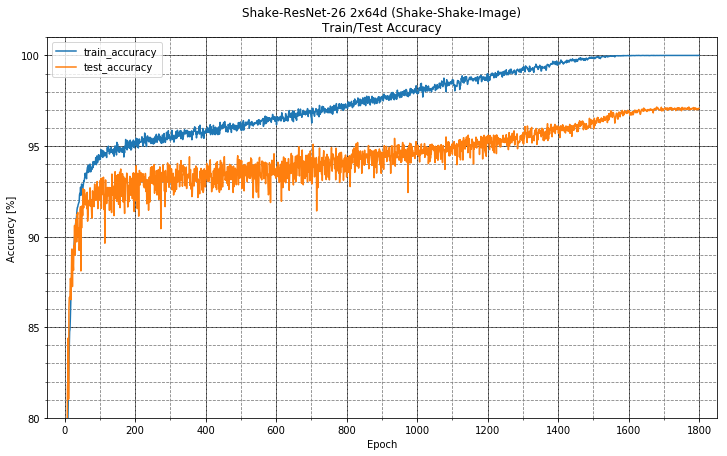

In [4]:
df.plot(x='Epoch', y=['train_accuracy', 'test_accuracy'], figsize=(12, 7))
plt.xlim(-50, 1850);  plt.xticks(np.arange(0, 1801, 200)); plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(100))
plt.ylim(80, 101.0); plt.yticks(np.arange(80.0, 100.1, 5.0)); plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='--')
plt.ylabel('Accuracy [%]')
plt.title('{}\nTrain/Test Accuracy'.format(model))
plt.show();

## Classification Error

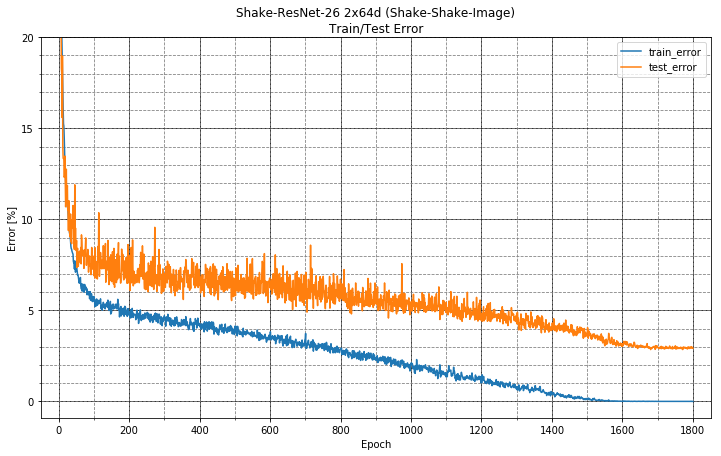

In [5]:
df.plot(x='Epoch', y=['train_error', 'test_error'], figsize=(12, 7))
plt.xlim(-50, 1850);  plt.xticks(np.arange(0, 1801, 200)); plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(100))
plt.ylim(-0.9, 20.0); plt.yticks(np.arange(-0.0, 20.1, 5.0)); plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='--')
plt.ylabel('Error [%]')
plt.title('{}\nTrain/Test Error'.format(model))
plt.show();

## Loss

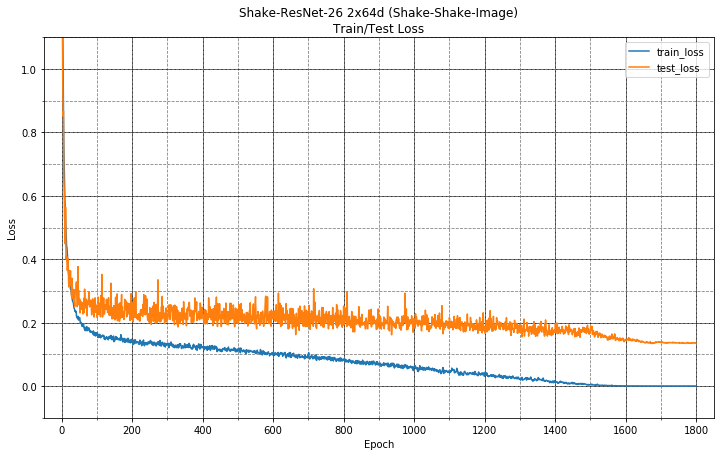

In [6]:
df.plot(x='Epoch', y=['train_loss', 'test_loss'], figsize=(12, 7))
plt.xlim(-50, 1850);  plt.xticks(np.arange(0, 1801, 200)); plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(100))
plt.ylim(-0.1, 1.1); plt.yticks(np.arange(0.0, 1.1, 0.2)); plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(0.1))
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='--')
plt.ylabel('Loss')
plt.title('{}\nTrain/Test Loss'.format(model))
plt.show();

## Learning rate

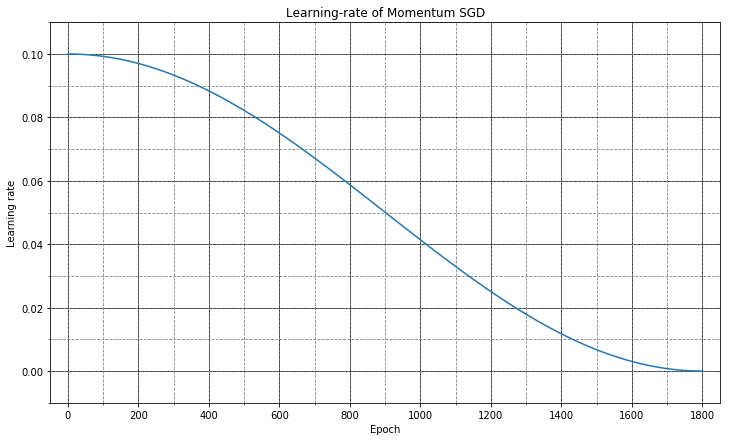

In [7]:
df.plot(x='Epoch', y=['lr'], figsize=(12, 7), legend=False)
plt.xlim(-50, 1850);  plt.xticks(np.arange(0, 1801, 200)); plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(100))
plt.ylim(-0.01, 0.11); plt.yticks(np.arange(0.0, 0.11, 0.02)); plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(0.01))
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='--')
plt.ylabel('Learning rate')
plt.title('Learning-rate of Momentum SGD')
plt.show();